# Google Play Store Apps

### Data Science project from Kaggle: 
https://www.kaggle.com/gauthamp10/google-playstore-apps

#### 
### Task description
Web scraped data of 10k Play Store apps for analysing the Android market.

Try to predict the rating of APP using linear regression.

#### 

### Load dataset

In [111]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
# load dataset
data = pd.read_csv('Google-Playstore.csv')

In [113]:
# check the dataset
data.head(3)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False


In [114]:
data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

In [116]:
# As some features are not good predictors and not useful for the model,we can drop it.
data.drop(labels=['App Name','App Id','Developer Id','Developer Email'],axis=1,inplace=True)


### 
### Features


App Name：Name of the app

App Id：Package name

Category：App category

Rating：Average rating

Rating Count：Number of ratingName of the app

Installs: Approximate install count

Minimum Installs:Approximate minimum app install count

Maximum Installs：Approximate maximum app install count

Free：Whether app is Free or Paid

price：App price

Currency：App currency

Size：Size of application package

Minimum Android：Minimum android version supported

Developer Id：Developer Id in Google Playstore

Developer Website：Website of developer

Developer Email：Email-id of developer

Released：App launch date on Google Playstore

Last Updated：Last app update date

Content Rating：Maturity level of app

Privacy Policy：Privacy policy from developer

Ad Supported：Ad support in app

In App Purchases：In-App purchases in app

Editors Choice：Whether rated as Editor Choice.
#### 

### Seperate dataset into train and test data

In [147]:
# split these datasets into normal train data and test data ramdomly
from sklearn.model_selection import train_test_split

X = data.drop(labels='Rating',axis=1)
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X_train.shape, X_test.shape

((838602, 18), (279534, 18))

#### 
### Data cleaning and feature engineering

### Handle Missing value

In [148]:
# number of columns with missing values
sum(data.isnull().sum()>0)

10

In [149]:
# number of missing values in each columns
data.isnull().sum().sort_values(ascending=False)/len(data)

Developer Website    0.370586
Privacy Policy       0.137304
Released             0.006913
Rating               0.006126
Rating Count         0.006126
Minimum Android      0.001800
Installs             0.000144
Minimum Installs     0.000144
Currency             0.000144
Category             0.000003
Free                 0.000000
Maximum Installs     0.000000
Editors Choice       0.000000
Price                0.000000
In App Purchases     0.000000
Last Updated         0.000000
Content Rating       0.000000
Ad Supported         0.000000
Size                 0.000000
dtype: float64

<AxesSubplot:>

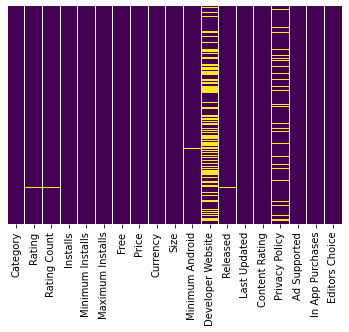

In [150]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### For features with no more than 5% missing value, we use frequent category imputation
#### For those features with a big number of missing value, we should not ignore this information.

In [151]:
# impute the missing data less than 5 percent of each features
from feature_engine.imputation import CategoricalImputer

variable_impute = ['Released','Rating Count','Minimum Android','Currency',
                   'Minimum Installs','Category','Installs']

imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=variable_impute)

In [152]:
X_train[variable_impute] = X_train[variable_impute].astype('O')
imputer.fit(X_train[variable_impute])

E:\Informatik\Anaconda\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


CategoricalImputer(imputation_method='frequent',
                   variables=['Released', 'Rating Count', 'Minimum Android',
                              'Currency', 'Minimum Installs', 'Category',
                              'Installs'])

In [153]:
# the values that will be used to replace NA for each variable
imputer.imputer_dict_

{'Released': 'Oct 13, 2020',
 'Rating Count': 0.0,
 'Minimum Android': '4.1 and up',
 'Currency': 'USD',
 'Minimum Installs': 1000.0,
 'Category': 'Education',
 'Installs': '1,000+'}

In [154]:
# transform the train and test data
X_train[variable_impute] = imputer.transform(X_train[variable_impute])
X_test[variable_impute] = imputer.transform(X_test[variable_impute])

In [155]:
# impute the missing value in output dataset
median = y_train.median()

y_train = y_train.fillna(median)
y_test = y_test.fillna(median)

In [156]:
# check features again,there is no missing value in these two columns now
X_train.isnull().sum().sort_values()

Category                  0
Ad Supported              0
Content Rating            0
Last Updated              0
Released                  0
Minimum Android           0
In App Purchases          0
Size                      0
Price                     0
Free                      0
Maximum Installs          0
Minimum Installs          0
Installs                  0
Rating Count              0
Currency                  0
Editors Choice            0
Privacy Policy       115361
Developer Website    311261
dtype: int64

In [157]:
# encode features with big number of missing values
# instead, we don't need the information of website of developer and privacy policy
from feature_engine.imputation import AddMissingIndicator

imputer_indicate = AddMissingIndicator(missing_only=True,variables=['Privacy Policy','Developer Website'])
imputer_indicate.fit(X_train)

AddMissingIndicator(variables=['Privacy Policy', 'Developer Website'])

In [158]:
# transform the dataset and drop the former features
X_train = imputer_indicate.transform(X_train)
X_test = imputer_indicate.transform(X_test)

X_train.drop(labels=['Privacy Policy','Developer Website'],inplace=True,axis=1)
X_test.drop(labels=['Privacy Policy','Developer Website'],inplace=True,axis=1)

In [159]:
# check the missing data again
X_train.isnull().sum()

Category                0
Rating Count            0
Installs                0
Minimum Installs        0
Maximum Installs        0
Free                    0
Price                   0
Currency                0
Size                    0
Minimum Android         0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Privacy Policy_na       0
Developer Website_na    0
dtype: int64

In [160]:
X_train['Installs'] = X_train['Installs'].str[:-1]
X_test['Installs'] = X_test['Installs'].str[:-1]

In [161]:
X_train['Installs']

479666         500
1079557         50
716097      10,000
480189         100
406127         100
            ...   
937967       1,000
579581     100,000
311895          50
661055       1,000
204614           1
Name: Installs, Length: 838602, dtype: object

In [162]:
X_train['Installs'].replace({'10,000':10000,'1,000':1000,'100,000':100000,'5,000':5000,'500':500,'50':50,"100":100,
                 '50,000':50000,'1,000,000':1000000,'500,000':500000,'5,000,000':5000000,'1':1,'0':0,'5':5,'10':10,
                 '10,000,000':10000000,'50,000,000':50000000,'100,000,000':100000000,'500,000,000':500000000,'10,000,000,000':10000000000,
                 '1,000,000,000':1000000000,'5,000,000,000':5000000000,'10,000,000,00':1000000000}, inplace=True)
X_test['Installs'].replace({'10,000':10000,'1,000':1000,'100,000':100000,'5,000':5000,'500':500,'50':50,"100":100,
                 '50,000':50000,'1,000,000':1000000,'500,000':500000,'5,000,000':5000000,'1':1,'0':0,'5':5,'10':10,
                 '10,000,000':10000000,'50,000,000':50000000,'100,000,000':100000000,'500,000,000':500000000,'10,000,000,000':10000000000,
                 '1,000,000,000':1000000000,'5,000,000,000':5000000000,'10,000,000,00':1000000000}, inplace=True)

### Categorical encoding

In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838602 entries, 479666 to 204614
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              838602 non-null  object 
 1   Rating Count          838602 non-null  float64
 2   Installs              838602 non-null  int64  
 3   Minimum Installs      838602 non-null  float64
 4   Maximum Installs      838602 non-null  int64  
 5   Free                  838602 non-null  bool   
 6   Price                 838602 non-null  float64
 7   Currency              838602 non-null  object 
 8   Size                  838602 non-null  object 
 9   Minimum Android       838602 non-null  object 
 10  Released              838602 non-null  object 
 11  Last Updated          838602 non-null  object 
 12  Content Rating        838602 non-null  object 
 13  Ad Supported          838602 non-null  bool   
 14  In App Purchases      838602 non-null  bool   


In [164]:
X_train.head()

,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Privacy Policy_na,Developer Website_na
479666,Productivity,0.0,500,500.0,907,True,0.0,USD,4.9M,2.1 and up,"Nov 20, 2019","Nov 20, 2019",Everyone,False,False,False,0,0
1079557,Action,0.0,50,50.0,63,True,0.0,USD,26M,4.0 and up,"Jan 21, 2018","Jan 28, 2018",Everyone,True,True,False,0,0
716097,Lifestyle,236.0,10000,10000.0,49868,True,0.0,USD,11M,4.1 and up,"Nov 20, 2015","Sep 27, 2019",Everyone,False,False,False,0,0
480189,Music & Audio,0.0,100,100.0,210,True,0.0,USD,3.1M,4.1 and up,"Feb 28, 2019","Feb 28, 2019",Everyone,True,False,False,0,0
406127,Music & Audio,0.0,100,100.0,218,True,0.0,USD,6.0M,4.1 and up,"Aug 12, 2020","Aug 13, 2020",Everyone,True,False,False,0,0


In [165]:
# first convert features with only two categories into binary variables

# find this features
col_list = X_train.columns[X_train.nunique()==2]
col_list

Index(['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Privacy Policy_na', 'Developer Website_na'],
      dtype='object')

In [167]:
# convert into binary value
for u in col_list:
    if X_train[u].dtype==bool:
        X_train[u]=X_train[u].astype('int')
        X_test[u]=X_test[u].astype('int')

In [168]:
# check the data type of each columns
for col in X_train.columns:
    print(col,": ",X_train[col].dtype)

# make list of variables types

# numerical: discrete and continuous
discrete = [var for var in X_train.columns if X_train[var].dtype!='O'and X_train[var].nunique()<10]
continuous = [var for var in X_train.columns if X_train[var].dtype!='O'and var not in discrete]

# categorical
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('\nThere are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

Category :  object
Rating Count :  float64
Installs :  int64
Minimum Installs :  float64
Maximum Installs :  int64
Free :  int32
Price :  float64
Currency :  object
Size :  object
Minimum Android :  object
Released :  object
Last Updated :  object
Content Rating :  object
Ad Supported :  int32
In App Purchases :  int32
Editors Choice :  int32
Privacy Policy_na :  int32
Developer Website_na :  int32

There are 6 discrete variables
There are 5 continuous variables
There are 7 categorical variables


In [169]:
X_train.select_dtypes(include='O').head()

,Category,Currency,Size,Minimum Android,Released,Last Updated,Content Rating
479666,Productivity,USD,4.9M,2.1 and up,"Nov 20, 2019","Nov 20, 2019",Everyone
1079557,Action,USD,26M,4.0 and up,"Jan 21, 2018","Jan 28, 2018",Everyone
716097,Lifestyle,USD,11M,4.1 and up,"Nov 20, 2015","Sep 27, 2019",Everyone
480189,Music & Audio,USD,3.1M,4.1 and up,"Feb 28, 2019","Feb 28, 2019",Everyone
406127,Music & Audio,USD,6.0M,4.1 and up,"Aug 12, 2020","Aug 13, 2020",Everyone


In [170]:
for i in categorical:
    print(i,X_train[i].nunique(),'\n',X_train[i].value_counts().head(10),'\n')

Category 48 
 Education            86537
Music & Audio        78337
Entertainment        61702
Books & Reference    59224
Personalization      55174
Tools                51735
Lifestyle            41040
Business             31561
Health & Fitness     23523
Productivity         22747
Name: Category, dtype: int64 

Currency 51 
 USD    806518
XXX     31519
EUR        95
INR        78
PKR        43
BRL        31
TRY        30
RUB        27
GBP        27
VND        15
Name: Currency, dtype: int64 

Size 1448 
 Varies with device    27979
11M                   21993
12M                   19861
13M                   17311
14M                   16255
16M                   15576
15M                   14495
10M                   12194
17M                   12026
18M                   10992
Name: Size, dtype: int64 

Minimum Android 122 
 4.1 and up            259893
4.4 and up            124065
5.0 and up            103601
4.0.3 and up           88615
4.0 and up             67120
4.2 and up    

In [171]:
from feature_engine.encoding import OneHotEncoder

ohe_enc_Cat = OneHotEncoder(top_categories=25,variables=['Category'],drop_last=True)
ohe_enc_Other = OneHotEncoder(top_categories=4,variables=['Currency','Content Rating'],drop_last=True)

In [172]:
X_test = pd.DataFrame(X_test)

In [173]:
ohe_enc_Other.fit(X_train)

X_train = ohe_enc_Other.transform(X_train)
X_test = ohe_enc_Other.transform(X_test)

In [174]:
ohe_enc_Cat.fit(X_train)

X_train = ohe_enc_Cat.transform(X_train)
X_test = ohe_enc_Cat.transform(X_test)

In [175]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838602 entries, 479666 to 204614
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Rating Count                 838602 non-null  float64
 1   Installs                     838602 non-null  int64  
 2   Minimum Installs             838602 non-null  float64
 3   Maximum Installs             838602 non-null  int64  
 4   Free                         838602 non-null  int32  
 5   Price                        838602 non-null  float64
 6   Size                         838602 non-null  object 
 7   Minimum Android              838602 non-null  object 
 8   Released                     838602 non-null  object 
 9   Last Updated                 838602 non-null  object 
 10  Ad Supported                 838602 non-null  int32  
 11  In App Purchases             838602 non-null  int32  
 12  Editors Choice               838602 non-null  int32  

### Feature Selection with feature engine

In [176]:
X_train = X_train.drop(labels=['Minimum Android','Released','Last Updated'],axis=1)
X_test = X_test.drop(labels=['Minimum Android','Released','Last Updated'],axis=1)

In [177]:
X_train.drop('Size',axis=1,inplace=True)
X_test.drop('Size',axis=1,inplace=True)

In [178]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features) # there are no constant features

[]


In [179]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [180]:
# print the number of quasi-constant features
quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant)

3

In [181]:
quasi_constant

Index(['Editors Choice', 'Currency_EUR', 'Currency_INR'], dtype='object')

In [182]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40


0

In [183]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

correlated features:  3


((838602, 41), (279534, 41))

#### 
### Handle the outliers in dataset

In [184]:
def dis_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

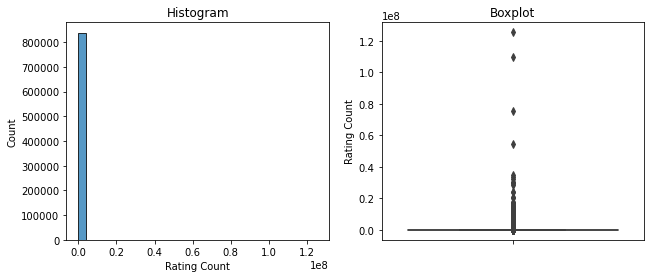

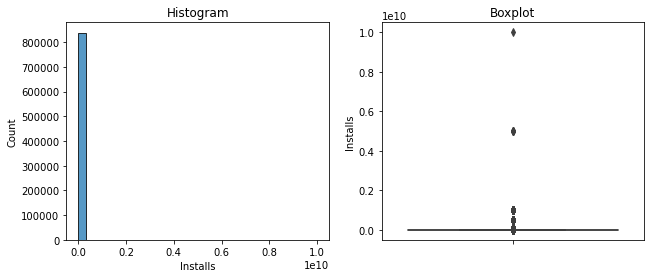

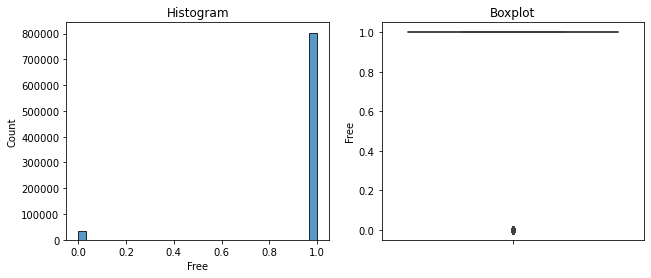

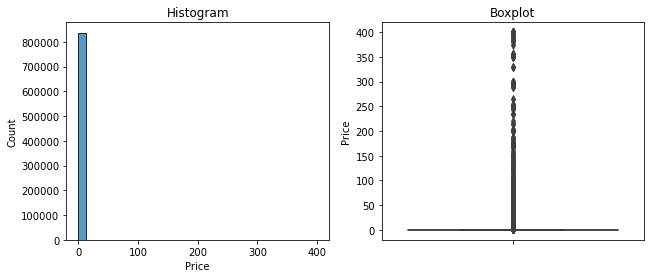

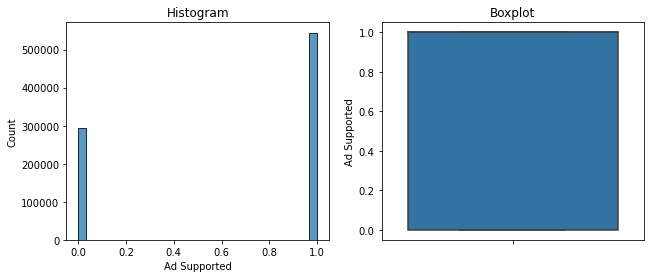

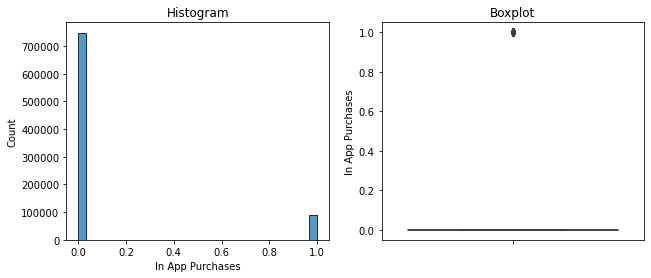

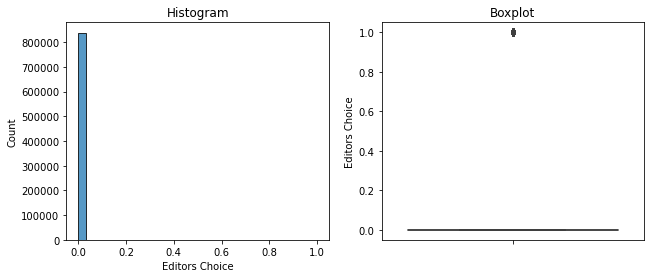

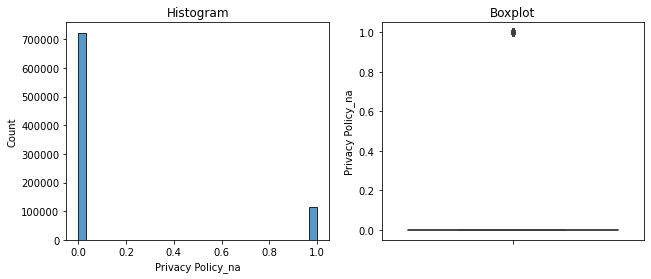

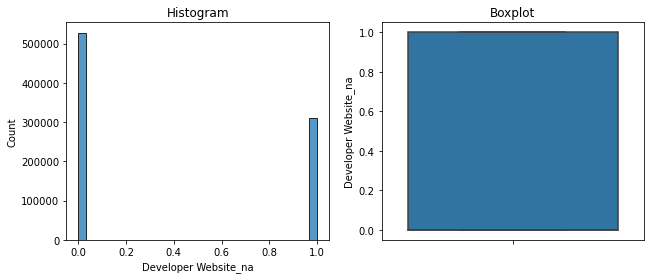

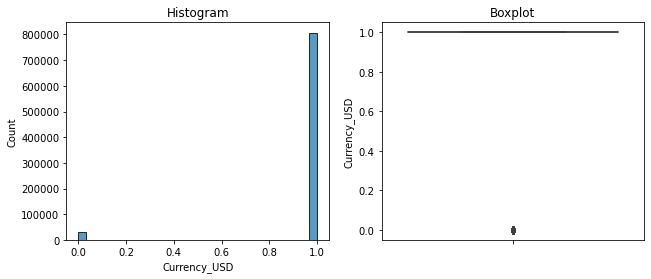

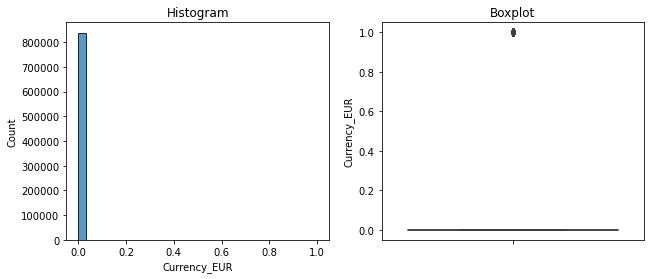

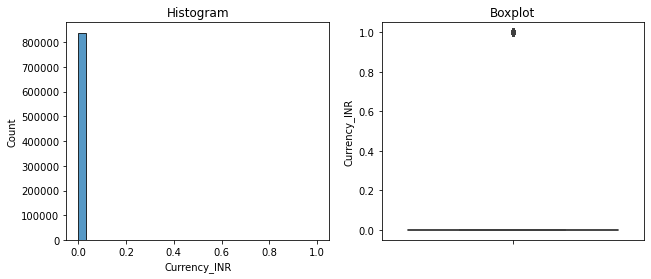

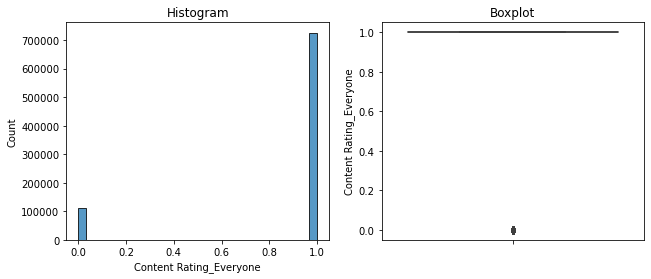

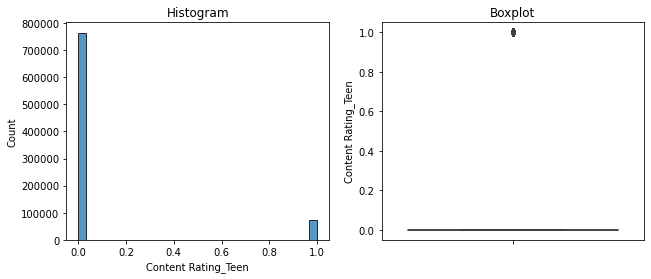

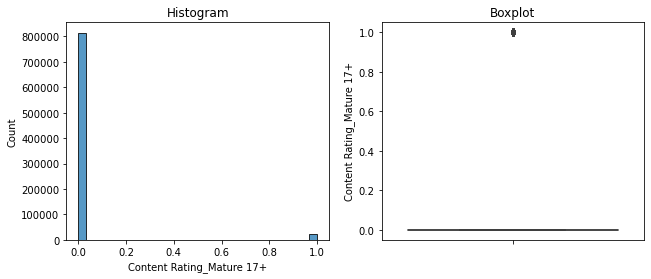

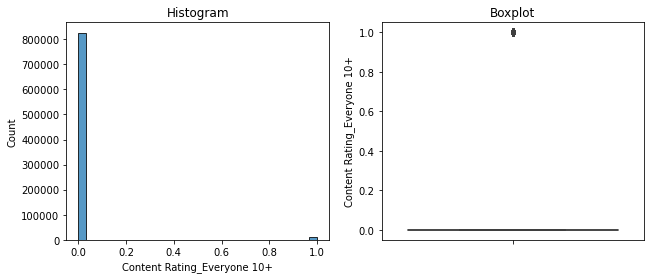

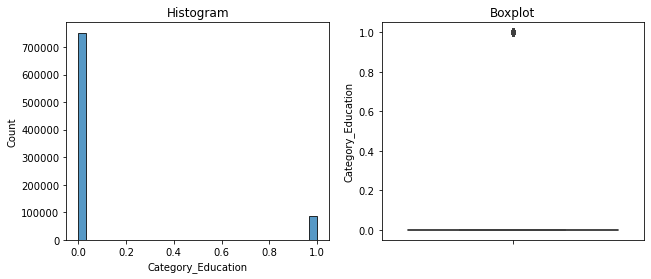

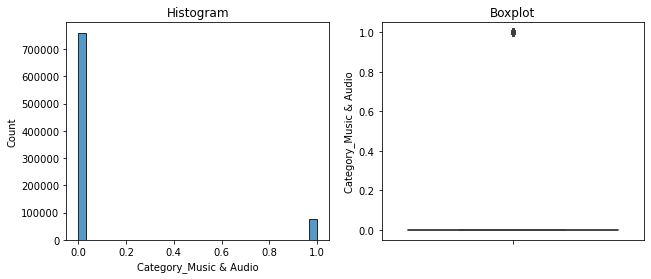

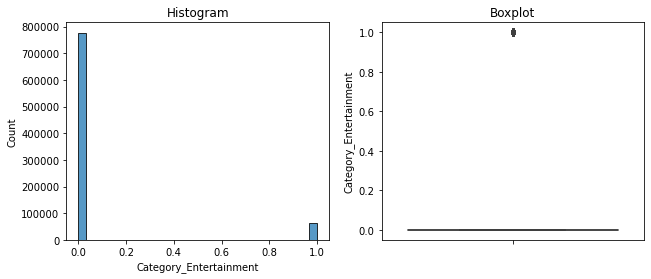

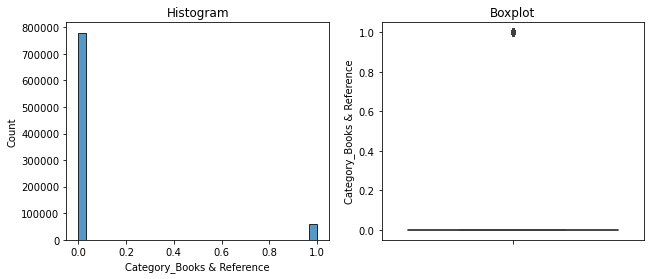

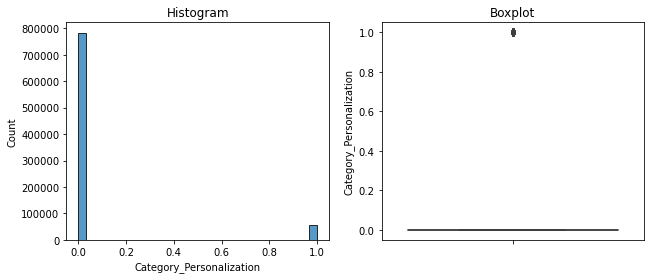

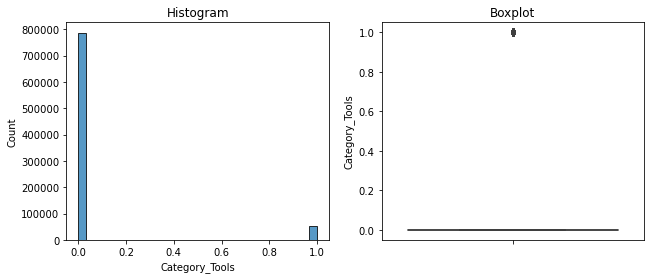

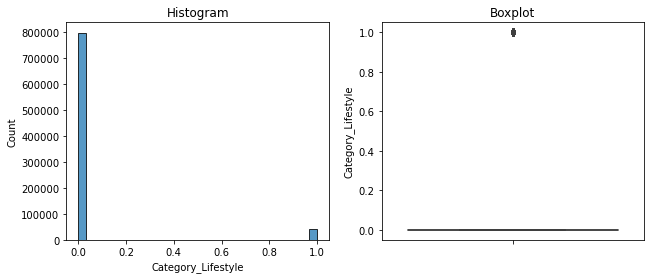

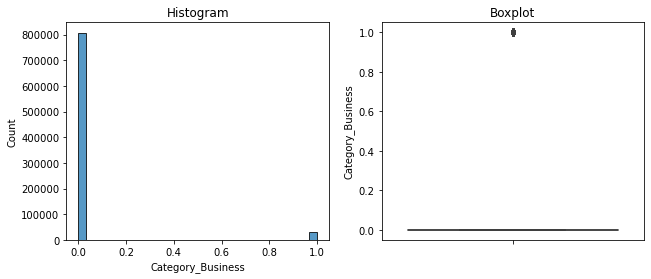

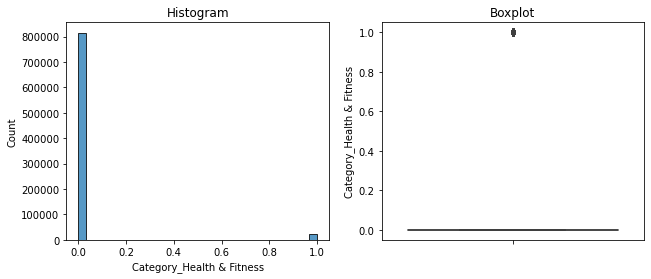

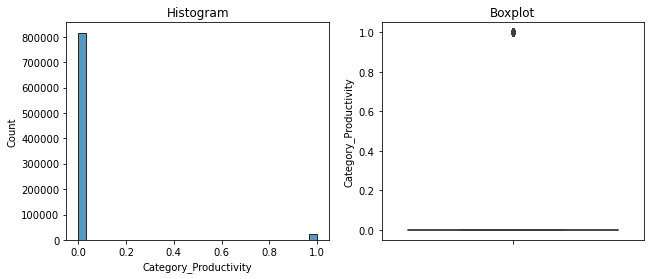

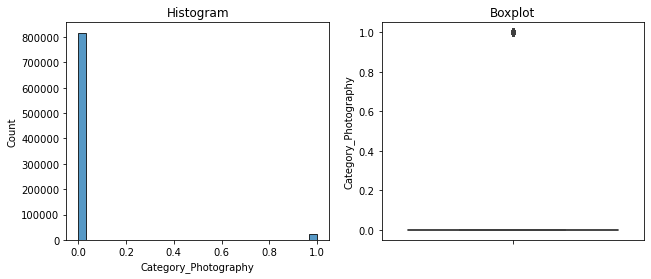

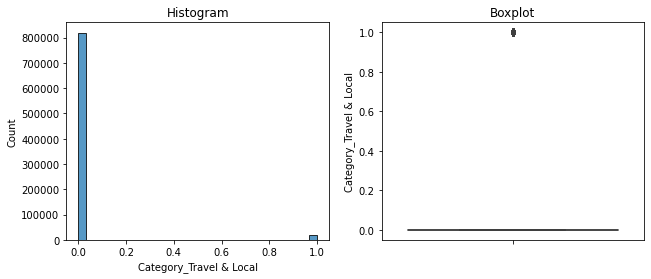

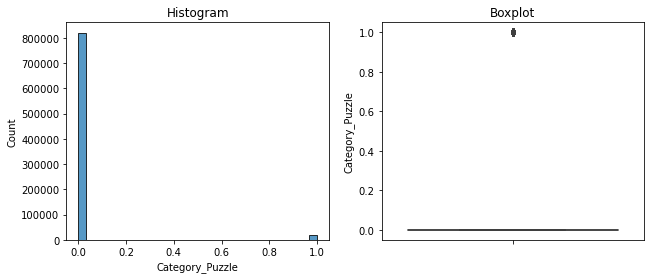

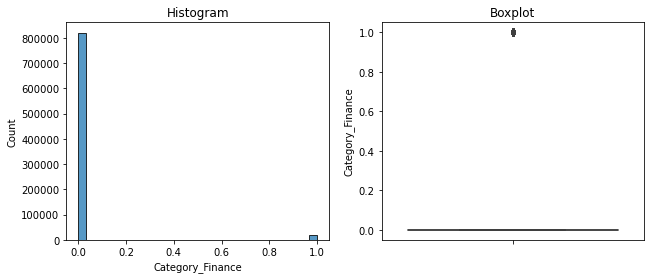

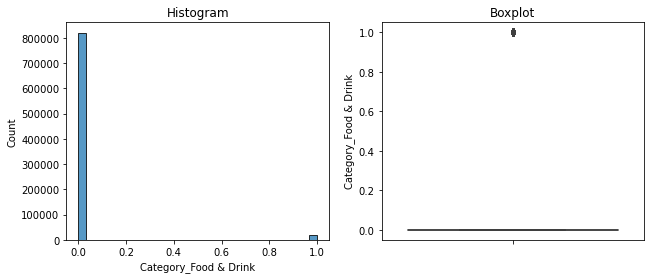

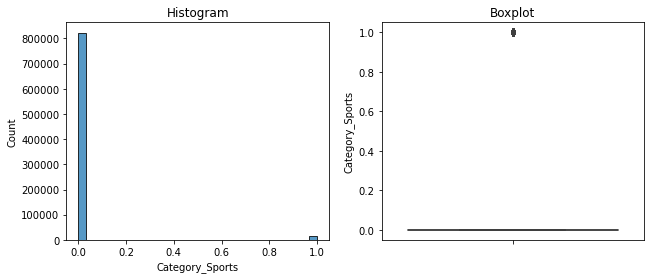

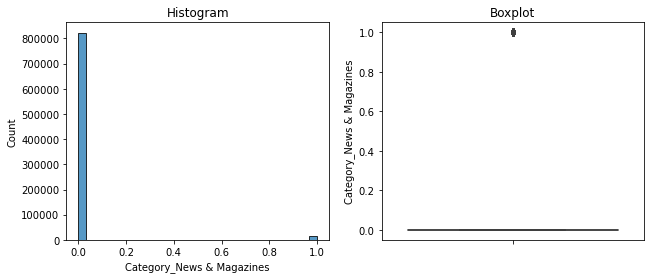

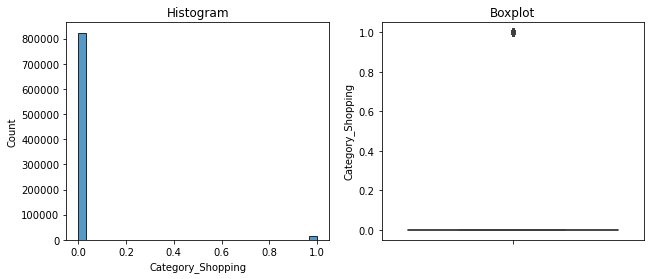

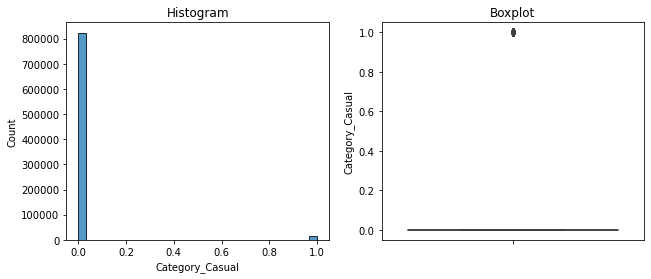

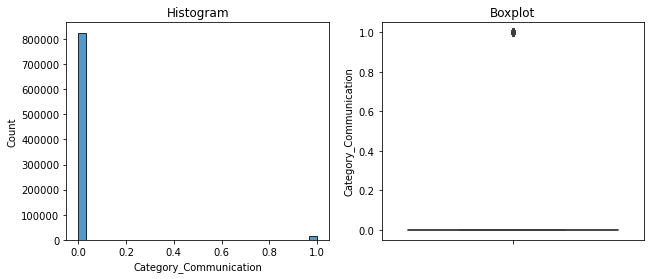

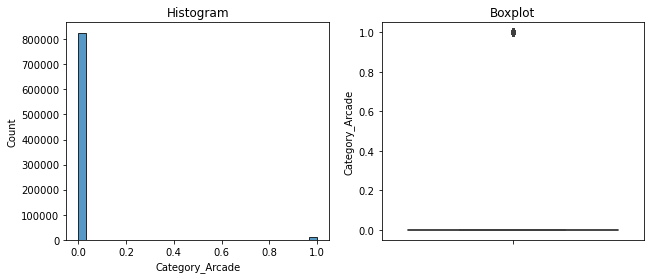

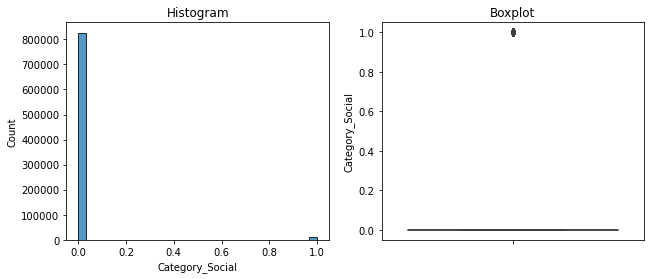

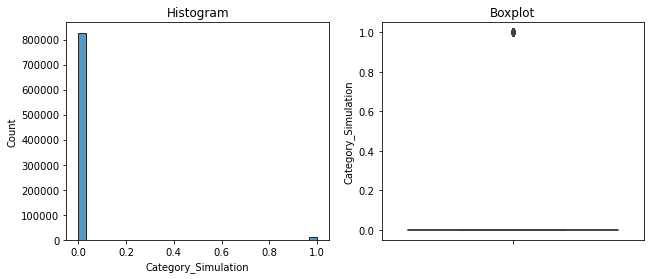

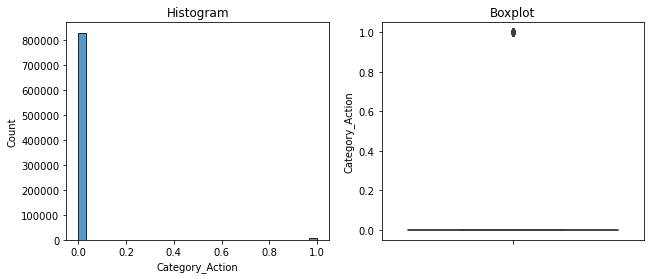

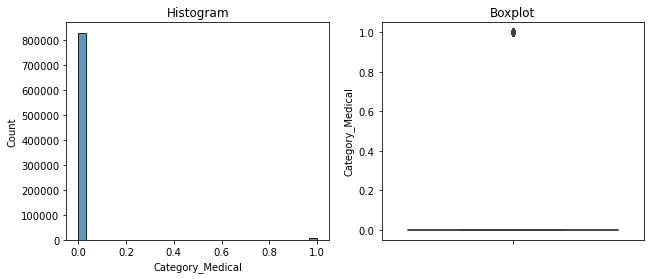

In [185]:
# show the distribution of each columns
for i in X_train.columns:
    dis_plots(X_train,i)

In [ ]:
# drop the outliers in feature training hours and city development index
#X_train['training_hours'] = np.where(X_train['training_hours']>200,200,X_train['training_hours'])
#X_train['city_development_index'] = np.where(X_train['city_development_index']<0.6,0.6,X_train['city_development_index'])

### Data preprocessing

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model building

In [188]:
# import machine learning algorithm model
from sklearn.linear_model import LinearRegression

In [191]:
LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [194]:
from sklearn import metrics

pred = LR.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.787338407418104
MSE: 3.8338023764492615
RMSE: 1.95800979988591
